In [3]:
import pandas as pd

searches = pd.read_csv(r'C:\Users\dvale\Desktop\searches.csv', delimiter='^')
bookings = pd.read_csv(r'C:\Users\dvale\Desktop\bookings.csv', delimiter='^')

C:\Users\dvale\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (40,41,42,44) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\dvale\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Exercise 1

Count the number of lines in Python for each file using Python.

In [2]:
searches_num_rows = searches.shape[0]
bookings_num_rows = bookings.shape[0]
print('The search file has {} rows and the bookings file has {} rows'.format(searches_num_rows, bookings_num_rows))

The search file has 20390198 rows and the bookings file has 10000010 rows


In [21]:
chunksize = 10000
counter = 0
for chunk in pd.read_csv(r'C:\Users\dvale\Desktop\bookings.csv', delimiter='^', chunksize=chunksize):
    counter += chunk.shape[0]
print('The bookings file has {} rows'.format(counter))

The bookings file has 10000010 rows


# Exercise 2

Top 10 arrival airports in the world in 2013 (using the bookings file).

- Arrival airport is the column arr_port. It is the IATA code for the airport
- To get the total number of passengers for an airport, you can sum the column
pax, grouping by arr_port. Note that there is negative pax. That corresponds to
cancelations. So to get the total number of passengers that have actually
booked, you should sum including the negatives (that will remove the canceled
bookings).
- Print the top 10 arrival airports in the standard output, including the number of
passengers.

In [3]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000010 entries, 0 to 10000009
Data columns (total 38 columns):
 #   Column               Dtype  
---  ------               -----  
 0   act_date             object 
 1   source               object 
 2   pos_ctry             object 
 3   pos_iata             object 
 4   pos_oid              object 
 5   rloc                 object 
 6   cre_date             object 
 7   duration             object 
 8   distance             object 
 9   dep_port             object 
 10  dep_city             object 
 11  dep_ctry             object 
 12  arr_port             object 
 13  arr_city             object 
 14  arr_ctry             object 
 15  lst_port             object 
 16  lst_city             object 
 17  lst_ctry             object 
 18  brd_port             object 
 19  brd_city             object 
 20  brd_ctry             object 
 21  off_port             object 
 22  off_city             object 
 23  off_ctry             object 
 

In [4]:
top_10 = bookings.groupby('arr_port').pax.sum().sort_values(ascending=False).head(10)
print(top_10)

arr_port
LHR         88809.0
MCO         70930.0
LAX         70530.0
LAS         69630.0
JFK         66270.0
CDG         64490.0
BKK         59460.0
MIA         58150.0
SFO         58000.0
DXB         55590.0
Name: pax, dtype: float64


In [17]:
bookings.columns = bookings.columns.str.strip()
bookings.columns

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')

In [26]:
chunksize = 10000
series = pd.Series([])
for chunk in pd.read_csv(r'C:\Users\dvale\Desktop\bookings.csv', delimiter='^', chunksize=chunksize, usecols=['pax','arr_port']):
    pax_sum = chunk.groupby('arr_port').pax.sum()
    series = series.add(pax_sum, fill_value=0)
series.sort_values(ascending=False).head(10)

<ipython-input-26-db80ca8af8b9>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series([])


arr_port
LHR         88809.0
MCO         70930.0
LAX         70530.0
LAS         69630.0
JFK         66270.0
CDG         64490.0
BKK         59460.0
MIA         58150.0
SFO         58000.0
DXB         55590.0
dtype: float64

# Exercise 3

Plot the monthly number of searches for
flights arriving at Málaga, Madrid or
Barcelona

- For the arriving airport, you can use the
Destination column in the searches file.
- Plot a curve for Málaga, another one for
Madrid, and another one for Barcelona, in
the same figure.

In [5]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20390198 entries, 0 to 20390197
Data columns (total 45 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Time               object 
 2   TxnCode            object 
 3   OfficeID           object 
 4   Country            object 
 5   Origin             object 
 6   Destination        object 
 7   RoundTrip          float64
 8   NbSegments         float64
 9   Seg1Departure      object 
 10  Seg1Arrival        object 
 11  Seg1Date           object 
 12  Seg1Carrier        object 
 13  Seg1BookingCode    object 
 14  Seg2Departure      object 
 15  Seg2Arrival        object 
 16  Seg2Date           object 
 17  Seg2Carrier        object 
 18  Seg2BookingCode    object 
 19  Seg3Departure      object 
 20  Seg3Arrival        object 
 21  Seg3Date           object 
 22  Seg3Carrier        object 
 23  Seg3BookingCode    object 
 24  Seg4Departure      object 
 25  Seg4Arrival     

In [32]:
searches['month'] = searches.Date.apply(lambda x: x[5:7])

In [33]:
MAD = searches[searches.Destination == 'MAD'].groupby('month').Destination.count()
MAD = MAD.to_frame().reset_index()
MAD = MAD.rename(columns = {'Destination': 'num_of_searches'})
MAD

,month,num_of_searches
0,01,24258
1,02,22800
2,03,24681
3,04,25251
4,05,26334
5,06,22800
6,07,22971
7,08,21831
8,09,21147
9,10,22294


In [30]:
chunksize = 10000
series = pd.Series([])
for chunk in pd.read_csv(r'C:\Users\dvale\Desktop\searches.csv', delimiter='^', chunksize=chunksize, usecols=['Date','Destination']):
    chunk['month'] = chunk.Date.apply(lambda x: x[5:7])
    Dest_count = chunk[chunk.Destination == 'MAD'].groupby('month').Destination.count()
    series = series.add(Dest_count, fill_value=0)
series = series.to_frame().reset_index()
series.columns = ['month', 'num_of_searches']
series

<ipython-input-30-fb0c28d983da>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series([])


,month,num_of_searches
0,01,24258.0
1,02,22800.0
2,03,24681.0
3,04,25251.0
4,05,26334.0
5,06,22800.0
6,07,22971.0
7,08,21831.0
8,09,21147.0
9,10,22294.0


In [34]:
BCN = searches[searches.Destination == 'BCN'].groupby('month').Destination.count()
BCN = BCN.to_frame().reset_index()
BCN = BCN.rename(columns = {'Destination': 'num_of_searches'})
BCN

,month,num_of_searches
0,01,29469
1,02,28329
2,03,30552
3,04,31236
4,05,28728
5,06,26505
6,07,29241
7,08,27075
8,09,23427
9,10,20276


In [35]:
chunksize = 10000
series = pd.Series([])
for chunk in pd.read_csv(r'C:\Users\dvale\Desktop\searches.csv', delimiter='^', chunksize=chunksize, usecols=['Date','Destination']):
    chunk['month'] = chunk.Date.apply(lambda x: x[5:7])
    Dest_count = chunk[chunk.Destination == 'BCN'].groupby('month').Destination.count()
    series = series.add(Dest_count, fill_value=0)
series = series.to_frame().reset_index()
series.columns = ['month', 'num_of_searches']
series

<ipython-input-35-c30a729184d6>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series([])


,month,num_of_searches
0,01,29469.0
1,02,28329.0
2,03,30552.0
3,04,31236.0
4,05,28728.0
5,06,26505.0
6,07,29241.0
7,08,27075.0
8,09,23427.0
9,10,20276.0


In [36]:
MLA = searches[searches.Destination == 'MLA'].groupby('month').Destination.count()
MLA = MLA.to_frame().reset_index()
MLA = MLA.rename(columns = {'Destination': 'num_of_searches'})
MLA

,month,num_of_searches
0,01,1995
1,02,2166
2,03,3648
3,04,2565
4,05,3363
5,06,2907
6,07,2907
7,08,2280
8,09,2508
9,10,2204


In [37]:
chunksize = 10000
series = pd.Series([])
for chunk in pd.read_csv(r'C:\Users\dvale\Desktop\searches.csv', delimiter='^', chunksize=chunksize, usecols=['Date','Destination']):
    chunk['month'] = chunk.Date.apply(lambda x: x[5:7])
    Dest_count = chunk[chunk.Destination == 'MLA'].groupby('month').Destination.count()
    series = series.add(Dest_count, fill_value=0)
series = series.to_frame().reset_index()
series.columns = ['month', 'num_of_searches']
series

<ipython-input-37-404fc058f2fa>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series([])


,month,num_of_searches
0,01,1995.0
1,02,2166.0
2,03,3648.0
3,04,2565.0
4,05,3363.0
5,06,2907.0
6,07,2907.0
7,08,2280.0
8,09,2508.0
9,10,2204.0


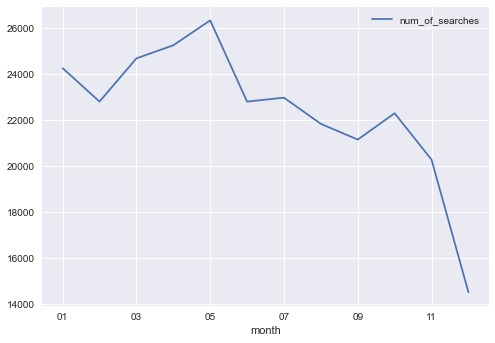

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

MAD.plot(x ='month', y='num_of_searches')
plt.show()

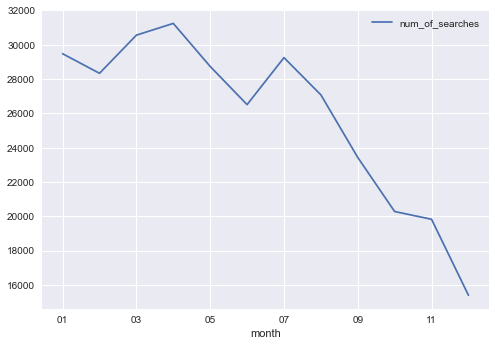

In [11]:
BCN.plot(x ='month', y='num_of_searches')
plt.show()

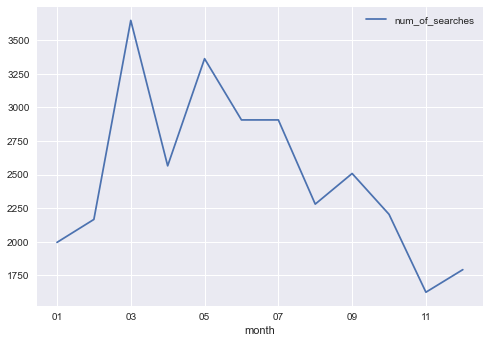

In [12]:
MLA.plot(x ='month', y='num_of_searches')
plt.show()

# Exercise 4

Match searches with bookings

- For every search in the searches file, find out whether
the search ended up in a booking or not (using the info
in the bookings file). For instance, search and booking
origin and destination should match.
- For the bookings file, origin and destination are the
columns dep_port and arr_port, respectively.
- Generate a CSV file with the search data, and an
additional field, containing 1 if the search ended up in
a booking, and 0 otherwise.

In [13]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice,month
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1.0,2.0,TXL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA,01
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0.0,1.0,ATH,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV,01
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1.0,2.0,ICT,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC,01
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0.0,1.0,RNB,...,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO,01
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1.0,2.0,OSL,...,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL,01


In [14]:
bookings.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1.0,2013.0,3.0,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1.0,2013.0,3.0,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1.0,2013.0,3.0,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1.0,2013.0,3.0,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1.0,2013.0,3.0,SYDA82546


In [15]:
bookings.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [16]:
bookings = bookings.rename(columns = {'cre_date           ': 'cre_date'})

In [17]:
df = bookings[['dep_port', 'arr_port']]
df['Date'] = bookings.cre_date.apply(lambda x: x[0:10])
df['all'] = df['dep_port']+df['arr_port']+df['Date']
df['bookings'] = 1
df.pop('Date')
df.pop('dep_port')
df.pop('arr_port')
df.rename(columns={'dep_port': 'Origin', 'arr_port': 'Destination'})
df.head()

<ipython-input-17-71a75ab0f24b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = bookings.cre_date.apply(lambda x: x[0:10])
<ipython-input-17-71a75ab0f24b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['all'] = df['dep_port']+df['arr_port']+df['Date']
<ipython-input-17-71a75ab0f24b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

,all,bookings
0,ZRH LHR 2013-02-22,1
1,SAL CLT 2013-03-26,1
2,SAL CLT 2013-03-26,1
3,AKL SVO 2013-03-26,1
4,AKL SVO 2013-03-26,1


In [26]:
searches['all'] = searches['Origin'] + ' ' + searches['Destination'] + ' ' + searches['Date'] + ' '
searches['all'].head()

0    TXL AUH 2013-01-01 
1    ATH MIL 2013-01-01 
2    ICT SFO 2013-01-01 
3    RNB ARN 2013-01-01 
4    OSL MAD 2013-01-01 
Name: all, dtype: object

In [24]:
merged_df.shape

(30390208, 48)